Support Vector Regression(SVR) 

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [6]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values 

In [7]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
y = y.reshape(len(y), 1)

In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [13]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [14]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVR model on the whole dataset

In [15]:
from sklearn.svm import SVR 
regressor = SVR(kernel= 'rbf')
regressor.fit(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [22]:
sc_y.inverse_transform(
    regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1)
)

array([[252789.13921624]])

Visualising the SVR results

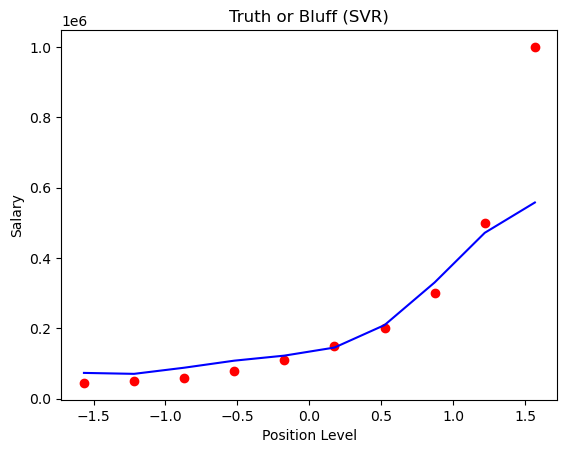

In [23]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue')
plt.title("Truth or Bluff (SVR)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualising the SVR results(for higher resolution and smoother curve)

/var/folders/3b/ly9h8hy931j_x7b1h6dbr1wc0000gn/T/ipykernel_46739/4245707801.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


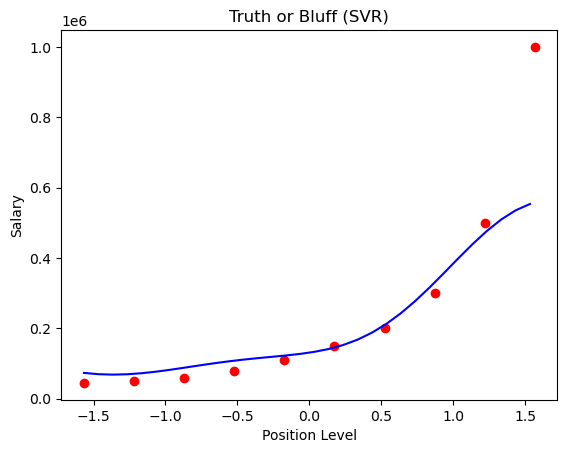

In [24]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'blue')
plt.title("Truth or Bluff (SVR)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()